In [26]:
import numpy as np
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import import_ipynb
import preprocessing

In [27]:
##Helper functions. Use when needed. 
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()


In [28]:
## Step 1: Read dataset and visualize it
df = pd.read_csv("face_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 4097 entries, 0 to target
dtypes: float64(4096), int64(1)
memory usage: 12.5 MB


In [29]:
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669422,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223141,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


In [30]:
targets = df["target"]
pixels = df.drop(["target"],axis=1)

np.array(pixels).shape



(400, 4096)

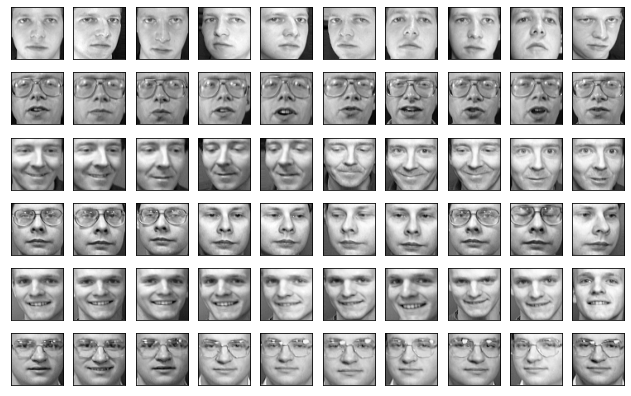

In [31]:
# Called show_orignal images function to show the 
# pictures in dataset 
show_orignal_images(pixels)

In [32]:
## Step 2: Split Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(pixels, targets)




In [33]:

print("x_train",x_train)

print("x_test",x_test)

print("y_train",y_train)

print("y_test",y_test)

print("Length of x_train:",len(x_train))
print("Length of x_test:",len(x_test))
print("Length of y_train:",len(y_train))
print("Length of y_test:",len(y_test))


x_train             0         1         2         3         4         5         6  \
82   0.520661  0.553719  0.574380  0.582645  0.595041  0.623967  0.644628   
187  0.388430  0.590909  0.764463  0.793388  0.801653  0.842975  0.859504   
364  0.219008  0.280992  0.537190  0.793388  0.793388  0.780992  0.789256   
74   0.260331  0.351240  0.438017  0.553719  0.648760  0.694215  0.747934   
173  0.524793  0.512397  0.553719  0.545455  0.557851  0.553719  0.603306   
..        ...       ...       ...       ...       ...       ...       ...   
142  0.528926  0.557851  0.574380  0.528926  0.524793  0.582645  0.619835   
102  0.326446  0.144628  0.260331  0.752066  0.847107  0.851240  0.847107   
179  0.363636  0.334711  0.380165  0.376033  0.392562  0.425620  0.479339   
286  0.280992  0.190083  0.190083  0.198347  0.247934  0.322314  0.442149   
98   0.099174  0.066116  0.322314  0.516529  0.578512  0.607438  0.628099   

            7         8         9  ...      4086      4087      408

In [34]:
# Compute a PCA (eigenfaces) on the olivetti dataset
# (treated as unlabeled dataset): 
# unsupervised feature extraction / dimensionality reduction

n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, x_train.shape[0]))

t0 = time()

pca = PCA(n_components= n_components, svd_solver='randomized', whiten=True).fit(x_train)

print("done in %0.3fs" % (time() - t0))





Extracting the top 150 eigenfaces from 300 faces
done in 0.155s


In [35]:
## Step 4: Project Training data to PCA

from preprocessing import n_row
from preprocessing import n_col


eigenfaces = pca.components_.reshape((n_components, n_row, n_col))

print("Projecting the input data on the eigenfaces orthonormal basis")

t0 = time()

Xtrain_pca = pca.transform(x_train)
Xtest_pca = pca.transform(x_test)

print("done in %0.3fs" % (time() - t0))




Projecting the input data on the eigenfaces orthonormal basis
done in 0.047s


In [36]:
# Printing mean of training dataset
np.mean(x_train)

0       0.392328
1       0.429091
2       0.473085
3       0.516253
4       0.553292
          ...   
4091    0.335000
4092    0.328857
4093    0.314601
4094    0.304835
4095    0.301281
Length: 4096, dtype: float64

In [37]:
# Printing covariance Matrix
matrix =np.cov(x_train)
print(matrix)
matrix.shape



[[0.0287552  0.01100751 0.01826598 ... 0.01230614 0.01046467 0.01341999]
 [0.01100751 0.02637433 0.01525333 ... 0.00917634 0.00926524 0.00983993]
 [0.01826598 0.01525333 0.03811038 ... 0.00887586 0.01156363 0.01154371]
 ...
 [0.01230614 0.00917634 0.00887586 ... 0.02287718 0.01557482 0.02135142]
 [0.01046467 0.00926524 0.01156363 ... 0.01557482 0.02144367 0.01875634]
 [0.01341999 0.00983993 0.01154371 ... 0.02135142 0.01875634 0.04376538]]


(300, 300)

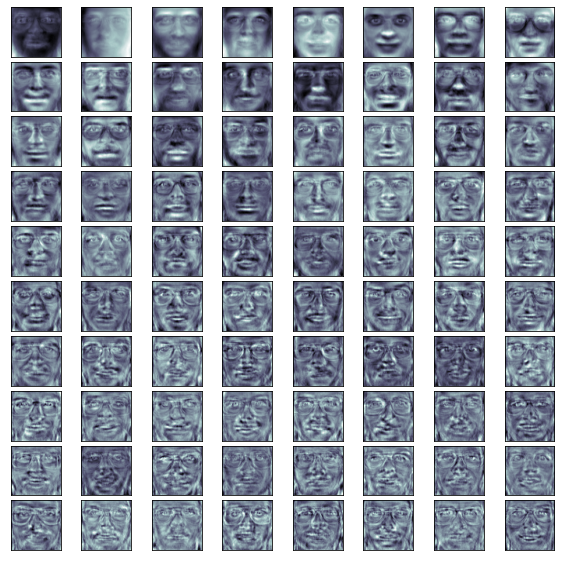

In [38]:
#Displaying Eigenfaces

fig, axes = plt.subplots(10, 8, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(64, 64), cmap='bone')

In [39]:
# Train a SVM classification model
## Step 5: Initialize Classifer and fit training data

# gamma = gamma values in the RBF kernel of the SVM
# C= number of PC components to use

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

print("Fitting the classifier to the training set")

t0 = time()

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)

clf = clf.fit(Xtrain_pca, y_train)

print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")

print(clf.best_estimator_)



Fitting the classifier to the training set


/Users/kamals/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


done in 3.687s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.0001)


In [40]:
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")

t0 = time()

y_pred = clf.predict(Xtest_pca)

print("done in %0.3fs" % (time() - t0))
print(y_pred)


Predicting people's names on the test set
done in 0.004s
[39  8 15  4 33  2 24 39 31  4 36 38 25  6 34  8  8 12  0  9 29 34  7 32
 32 23 22 13 14 31 31 28  9 30 31 35 39 35  6 39 29  3  7  6 27  1 23 31
 12 22 36 13  1 29 22 26 23 30 39 35  3 35  1 10  5 23  2 38 36 20 33  5
 37 19 34 29  6 34 14 25 19 17 14 29 14 20 14 33 27  4 37 33 35  4 15 16
 22  0 25  8]


In [41]:
# Predicted Values vs Actual values

df = pd.DataFrame(y_pred,y_test)
df

,0
target,
39,39
8,8
15,15
34,4
33,33
...,...
16,16
22,22
12,0


In [42]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       0.75      0.75      0.75         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          12       1.00      0.29      0.44         7
          13       1.00      1.00      1.00         2
          14       0.40      1.00      0.57         2
          15       1.00      0.67      0.80         3
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          19       1.00    

In [43]:
from preprocessing import n_classes
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


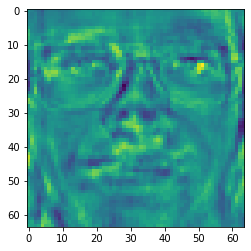

In [44]:
loadeigen = eigenfaces[70]
imshow(loadeigen) 



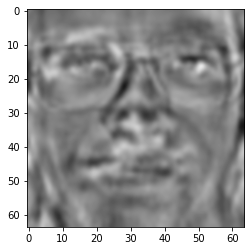

In [45]:
# plot the single eigen face of the most significative eigenfaces

import cv2
img = cv2.imread('loadeigen',0)
plt.imshow(loadeigen,cmap = 'gray', interpolation = 'bicubic')
plt.show()



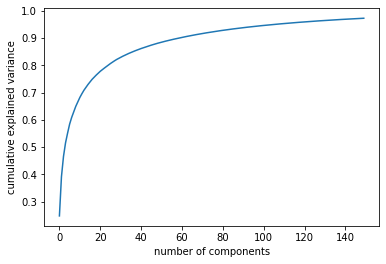

In [46]:


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');



In [47]:
# We see that these 150 components account for just over 92% of the variance. 
# That would lead us to believe that using these 150 components,
# we would recover most of the essential characteristics of the data.

# To make this more concrete, we can compare the input images with the images 
# reconstructed from these 150 components.


